In [4]:
from htrc_features import FeatureReader
import os

## Reading your First Volume
The HTRC Feature Reader library has two main objects: **FeatureReader** and a **Volume**.

The **FeatureReader** object is the interface for loading the dataset files and making sense of them. The files are originally formatted in a notation called JSON and compressed, which FeatureReader makes sense of and returns as Volume objects. A **Volume** is a representation of a single book or other work. This is where you access features about a work.

Let's load two volumes to understand how the FeatureReader works. Run the following cell, by selecting it and pressing the 'play' button or pressing `Ctrl+Enter`. This should give you the input shown below.

In [7]:
paths = ['data/sample-file1.json.bz2', 'data/sample-file2.json.bz2']
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

June / by Edith Barnard Delano ; with illustrations.
You never know your luck; being the story of a matrimonial deserter, by Gilbert Parker ... illustrated by W.L. Jacobs.


Here, the FeatureReader is imported and initialized with file paths pointing to two Extracted Features files from the `data` subfolder: `data/sample-file1.json` and `data/sample-file2.json`.

With `fr = FeatureReader(paths)`, the FeatureReader is initialized, meaning it is ready to use. An initialized FeatureReader is holding references to the file paths that we gave it, and will load them into Volume objects when asked.

Consider the last bit of code:

```python
for vol in fr.volumes():
    print(vol.title)
```

This code asks for volumes in a way that can be iterated through. The `for` loop is saying to `fr.volumes()`, "give me every single volume that you have, one by one." Each time the `for` loop gets a volume, it starts calling it `vol`, runs what is inside the loop on it, then asks for the next one. In this case, we just told it to print the title of the volume.

TODO
- simplify or move the discussion about generators elsewhere
- add more sample data to the data folder

### Exercise
Try to modify the code above to determine the names of the books in `TODO` and `TODO2`.

Once you have the answer, look around, and help anybody you see that is still figuring it out.

## What's in a Volume?

Let's take a closer look at what features are accessible for a Volume object. For clarity, we'll grab the first Volume to focus on, which can conveniently be accessed with the `first()` method. Any code you write can easily be run later with a `for vol in fr.volumes()` loop.

Again here, start a new code cell in the same notebook that you had open before and run the following code. The FeatureReader does not need to be loaded again: it is still initialized and accessible as `fr` from earlier.

In [8]:
# Reading a single volume
vol = fr.first()
vol

While the majority of the HTRC Extracted Features dataset is *features*, quantitative abstractions of a book's written content, there is also a small amount of metadata included for each volume. We already saw `Volume.title` accessed earlier. Other metadata attributes include:

- `Volume.id`: A unique identifier for the volume in the HathiTrust and the HathiTrust Research Center.
- `Volume.year`: The publishing date of the volume.
- `Volume.language`: The classified language of the volume.
- `Volume.oclc`: The OCLC control number(s).

The volume id can be used to pull more information from other sources. The scanned copy of the book can be found from the HathiTrust Digital Library, when available, by accessing `http://hdl.handle.net/2027/{VOLUME ID}`. In the feature reader, this url is retrieved by calling `vol.handle_url`:

In [11]:
vol.handle_url

'http://hdl.handle.net/2027/nyp.33433074811310'

<img src="images/June-cover.PNG" width="250px" alt="Digital copy of sample book"  />

Hopefully by now you are growing more comfortable with the process of running code in a Jupyter notebook, starting a cell, writing code, and running the cell. A valuable property of this type of interactive coding is that there is room for error. An error doesn't cause the whole program to crash, requiring you to rerun everything from the start. Instead, just fix the code in your cell and try again.

In Jupyter, pressing the 'TAB' key will guess at what you want to type next. Typing `vo` then TAB will fill in `vol`, typing `Fea` then TAB will fill in `FeatureReader`.

Auto-completion with the tab key also provides more information about what you can get from an object. Try typing `vol.` (with the period) in a new cell, then press TAB. Jupyter shows everything that you can access for that Volume.

<img src="images/autocomplete.png" width="350px" alt="Tab Autocomplete in Jupyter">

The Extracted Features dataset does not hold all the metadata that the HathiTrust has for the book. More in-depth metadata like genre and subject class needs to be grabbed from other sources, such as the [HathiTrust Bibliographic API](https://www.hathitrust.org/bib_api). The URL to access this information can be retrieved with `vol.ht_bib_url`.

## Exercise

- TODO: Auto-complete exercise

## Our First Feature Access: Visualizing Words Per Page

It's time to access the first features of `vol`: a table of total words for every single page. These can be accessed by calling `vol.tokens_per_page()`. Try the following code.

> If you are using a Jupyter notebook, returning this table at the end of a cell formats it nicely in the browser. Below, you'll see us append `.head()` to the `tokens` table, which allows us to look at just the top few rows: the 'head' of the data. 

In [ ]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

,count
page,
1,5
2,0
3,1
4,0
5,1


> No print! We didn't call 'print()' to make Jupyter show the table. Instead, it automatically guessed that you want to display the information from the last code line of the cell.

This is a straightforward table of information, similar to what you would see in Excel or Google Spreadsheets. Listed in the table are page numbers and the count of words on each page. With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a `plot` method for data graphics. Without extra arguments, `tokens.plot()` will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

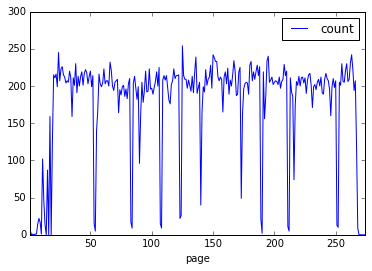

In [ ]:
%matplotlib inline
tokens.plot()

> `%matplotlib inline` tells Jupyter to show the plotted image directly in the notebook web page. It only needs to be called once, and isn't needed if you're not using notebooks.

On some systems, this may take some time the first time. It is clear that pages at the start of a book have fewer words per page, after which the count is fairly steady except for occasional valleys.

You may have some guesses for what these patterns mean. A look at the [scans](http://hdl.handle.net/2027/nyp.33433074811310) confirms that the large valleys are often illustration pages or blank pages, small valleys are chapter headings, and the upward pattern at the start is from front matter. 

Not all books will have the same patterns so we can't just codify these correlations for millions of books. However, looking at this plot makes clear an inportant assumption in text and data mining: that there are patterns underlying even the basic statistics derived from a text. The trick is to identify the consistent and interesting patterns and teach them to a computer.

### Understanding DataFrames

Wait... how did we get here so quickly!? We went from a volume to a data visualization in two lines of code. The magic is in the data structure used to hold our table of data: a DataFrame.

A **DataFrame** is a type of object provided by the data analysis library, Pandas. **Pandas** is very common for data analysis, allowing conveniences in Python that are found in statistical languages like R or Matlab.

In the first line, `vol.tokens_per_page()` returns a DataFrame, something that can be confirmed if you ask Python about its type with `type(tokens)`. This means that _after setting `tokens`, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas_. `tokens.head()` used a DataFrame method to look at the first few rows of the dataset, and `tokens.plot()` uses a method from Pandas to visualize data.

Many of the methods in the HTRC Feature Reader return DataFrames. The aim is to fit into the workflow of an experienced user, rather than requiring them to learn proprietary new formats. For new Python data mining users, learning to use the HTRC Feature Reader means learning many data mining skills that will translate to other uses.

## Loading a Token List

The information contained in `vol.tokens_per_page()` is minimal, a sum of all words in the body of each page. 
The Extracted Features dataset also provides token counts with much more granularity: for every part of speech (e.g. noun, verb) of every occurring capitalization of every word of every section (i.e. header, footer, body) of every page of the volume. 

`tokens_per_page()` only kept the "for every page" grouping; `vol.tokenlist()` can be called to return section-, part-of-speech-, and word-specific details:

In [ ]:
tl = vol.tokenlist()
# Let's look at some words deeper into the book:
# from 1000th to 1100th row, skipping by 15 [1000:1100:15]
tl[1000:1100:15]

count
page section token     pos       
27   body    those     DT       1
             within    IN       1
28   body    a         DT       3
             be        VB       1
             deserted  VBN      1
             faintly   RB       1
             important JJ       1

As before, the data is returned as a Pandas DataFrame. This time, there is much more information. Consider a single row:

<img src="images/single-row-tokencount.png" width="300px" alt="Single row of tokenlist." />

The columns in bold are an index. Unlike the typical one-dimensional index seen before, here there are four dimensions to the index: page, section, token, and pos. This row says that for the 24th page, in the body section (i.e. ignoring any words in the header or footer), the word 'years' occurs 1 time as an plural noun. The part-of-speech tag for a plural noun, `NNS`, follows the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) definition.

> The "words" on the first page seems to be OCR errors for the cover of the book. The HTRC Feature Reader refers to "pages" as the $n^{th}$ scanned image of the volume, not the actual number printed on the page. This is why "page 1" for this example is the cover.

Tokenlists can be retrieved with arguments that combine information by certain dimensions, such as `case`, `pos`, or `page`. For example, `case=False` specified that "Jaguar" and "jaguar" should be counted together. You may also notice that, by default, only 'body' is returned, a default that can be overridden.

Look at the following list of commands: can you guess what the output will look like? Try for yourself and observe how the output changes.

 - `vol.tokenlist(case=False)`
 - `vol.tokenlist(pos=False)`
 - `vol.tokenlist(pages=False, case=False, pos=False)`
 - `vol.tokenlist(section='header')`
 - `vol.tokenlist(section='group')`

Details for these arguments are available in the code [documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume.tokenlist) for the Feature Reader.

Jupyter provides another convenience here. Documentation can be accessed within the notebook by adding a '?' to the start of a piece of code. Try it with `?vol.tokenlist`, or with other objects or variables.